In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [44]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv("./test.csv")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [48]:
data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

# Мини анализ

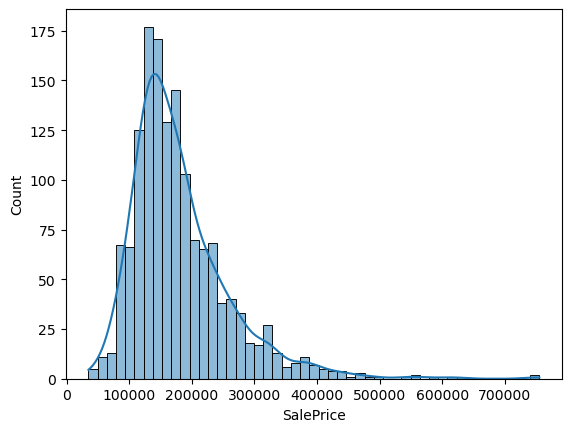

In [49]:
sns.histplot(x='SalePrice', data = data, kde = True)
plt.show()

# Подготовка данных

In [50]:
feature = np.array(data.columns.to_list())

In [51]:
feature

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [52]:
nan_val_col = feature[np.array(data.isnull().sum())>146]
nan_val_col

array(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype='<U13')

In [53]:
data_temp = data.drop(nan_val_col, axis=1)
test_data.drop(nan_val_col, axis=1, inplace=True)

In [54]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

Работа с категориальными фичами

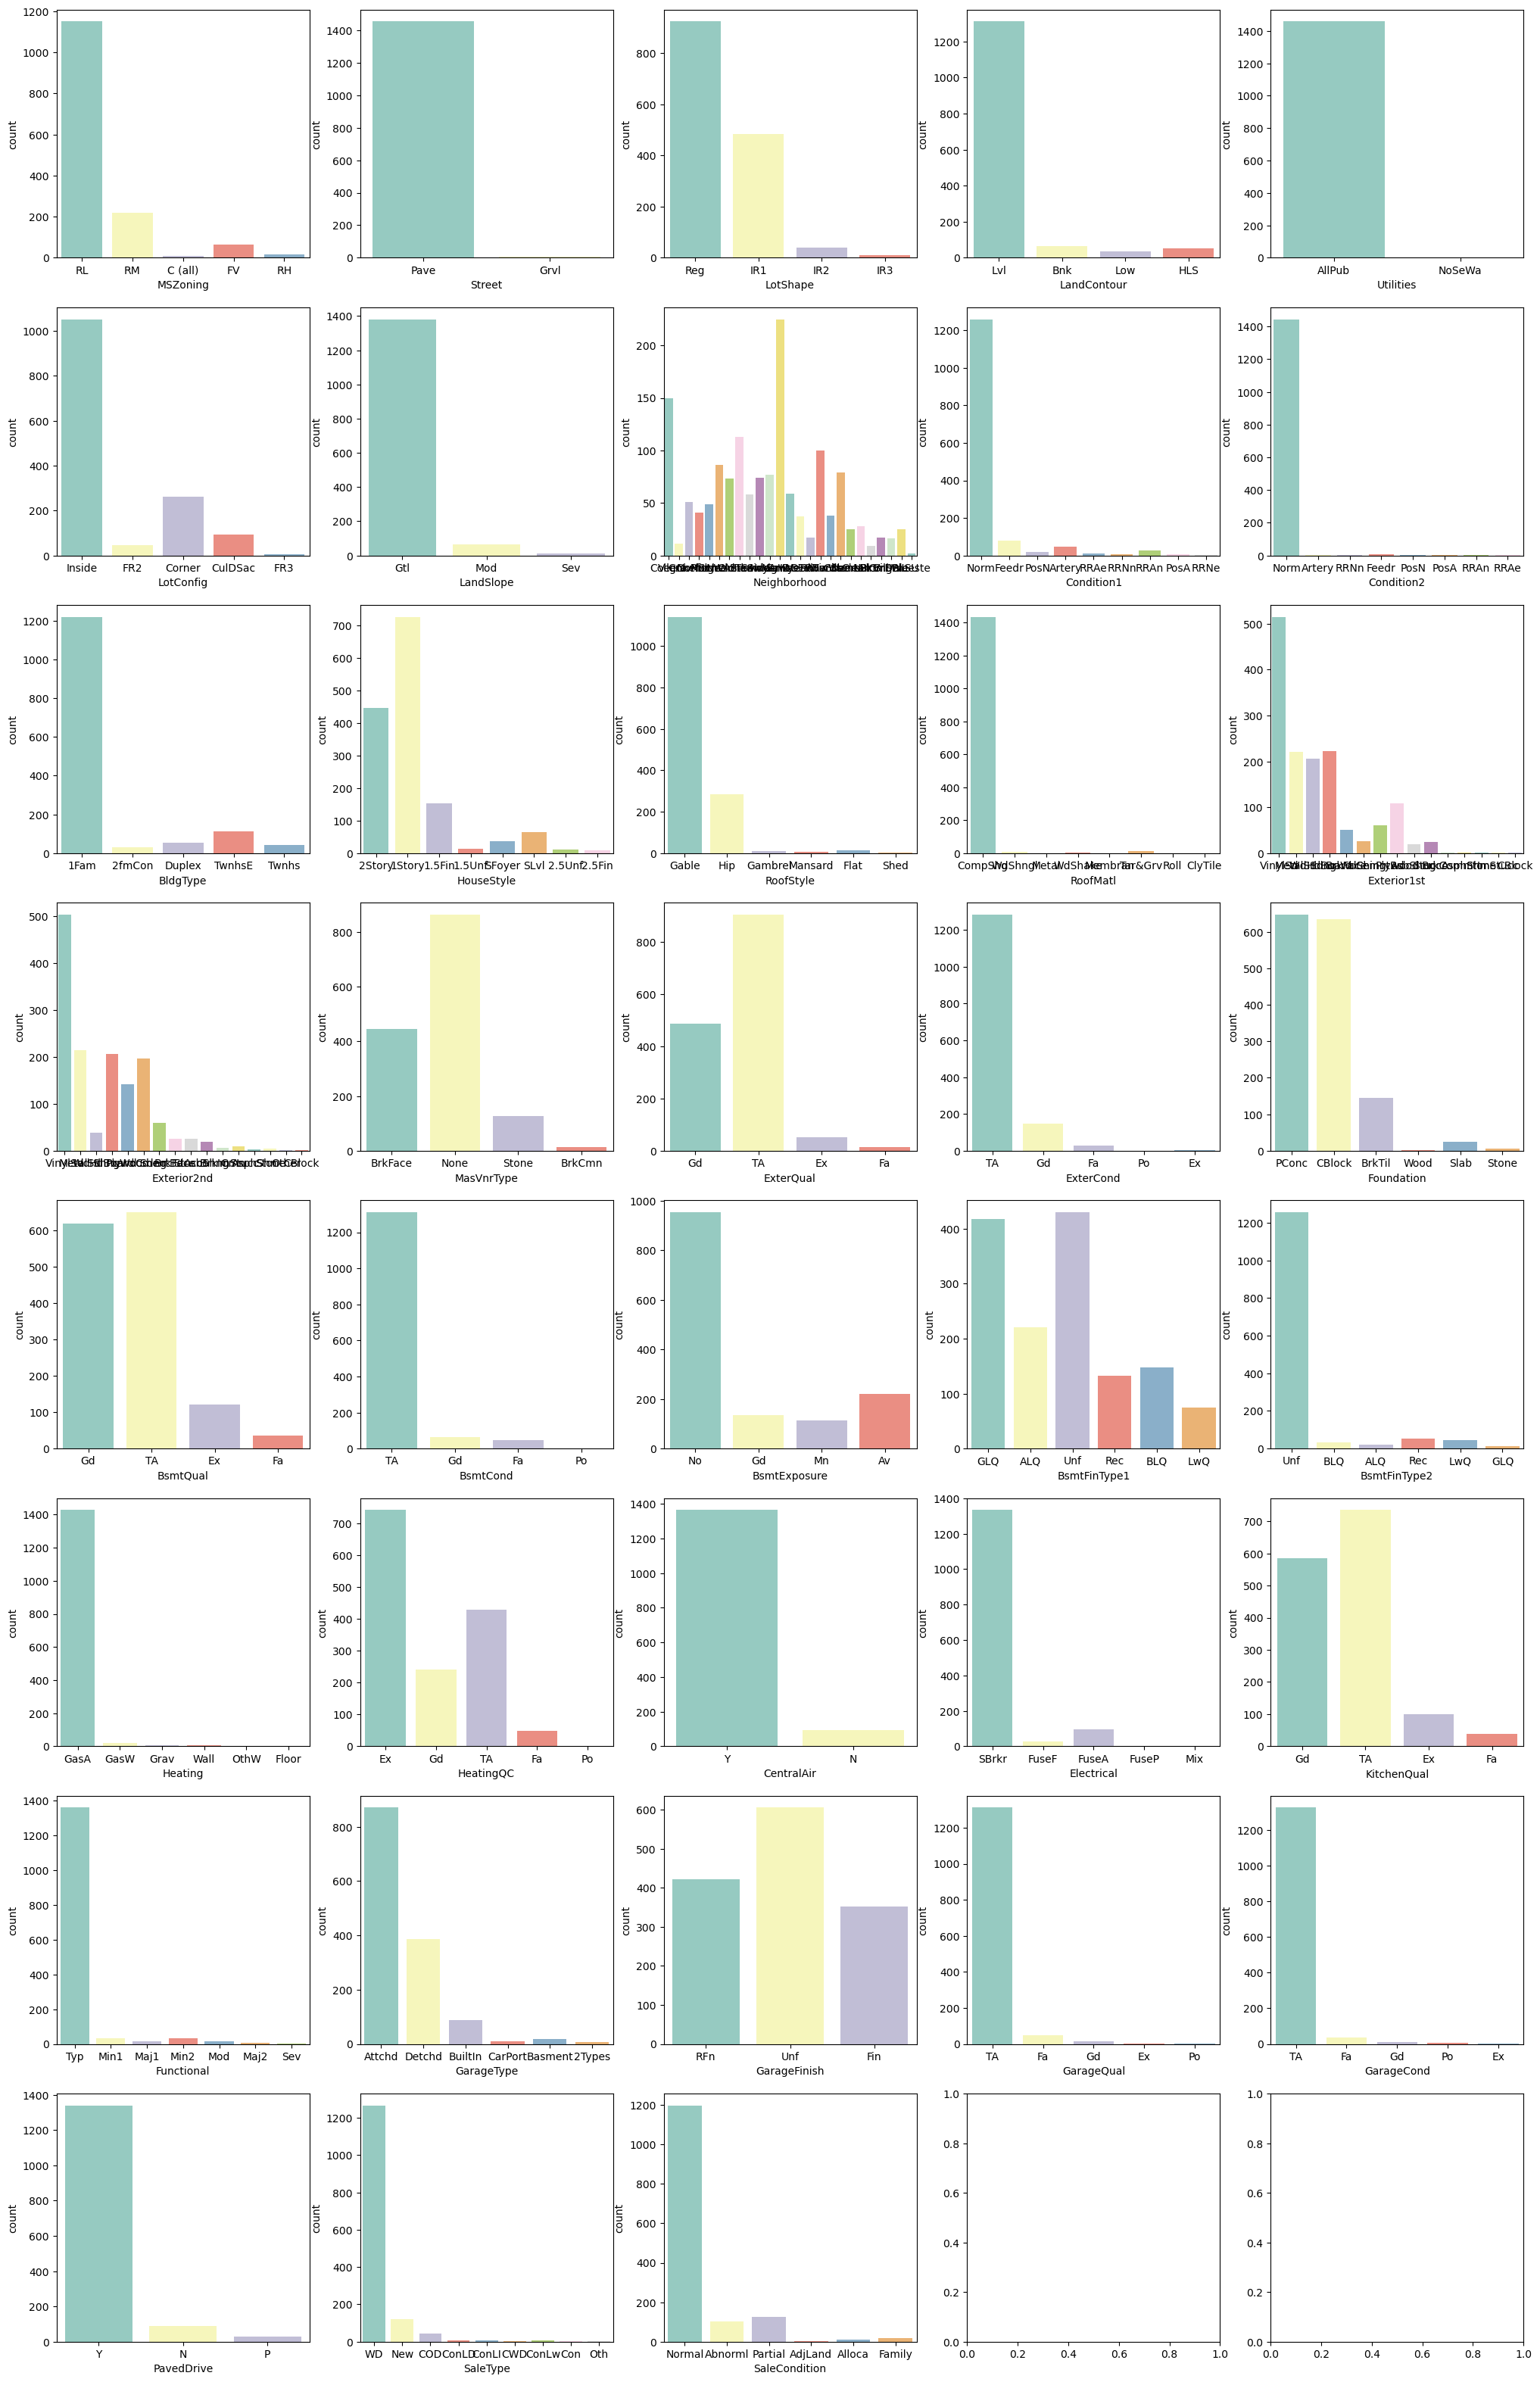

In [55]:
f,ax = plt.subplots(8,5, figsize=(25,40))
k=0
for i in range(8):
    for j in range(5):
        if k<38:
            sns.countplot(x=cat_features[k], data=data_temp, ax=ax[i][j], palette='Set3')
            k=k+1

In [56]:
data_temp.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)
test_data.drop(['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)

In [57]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

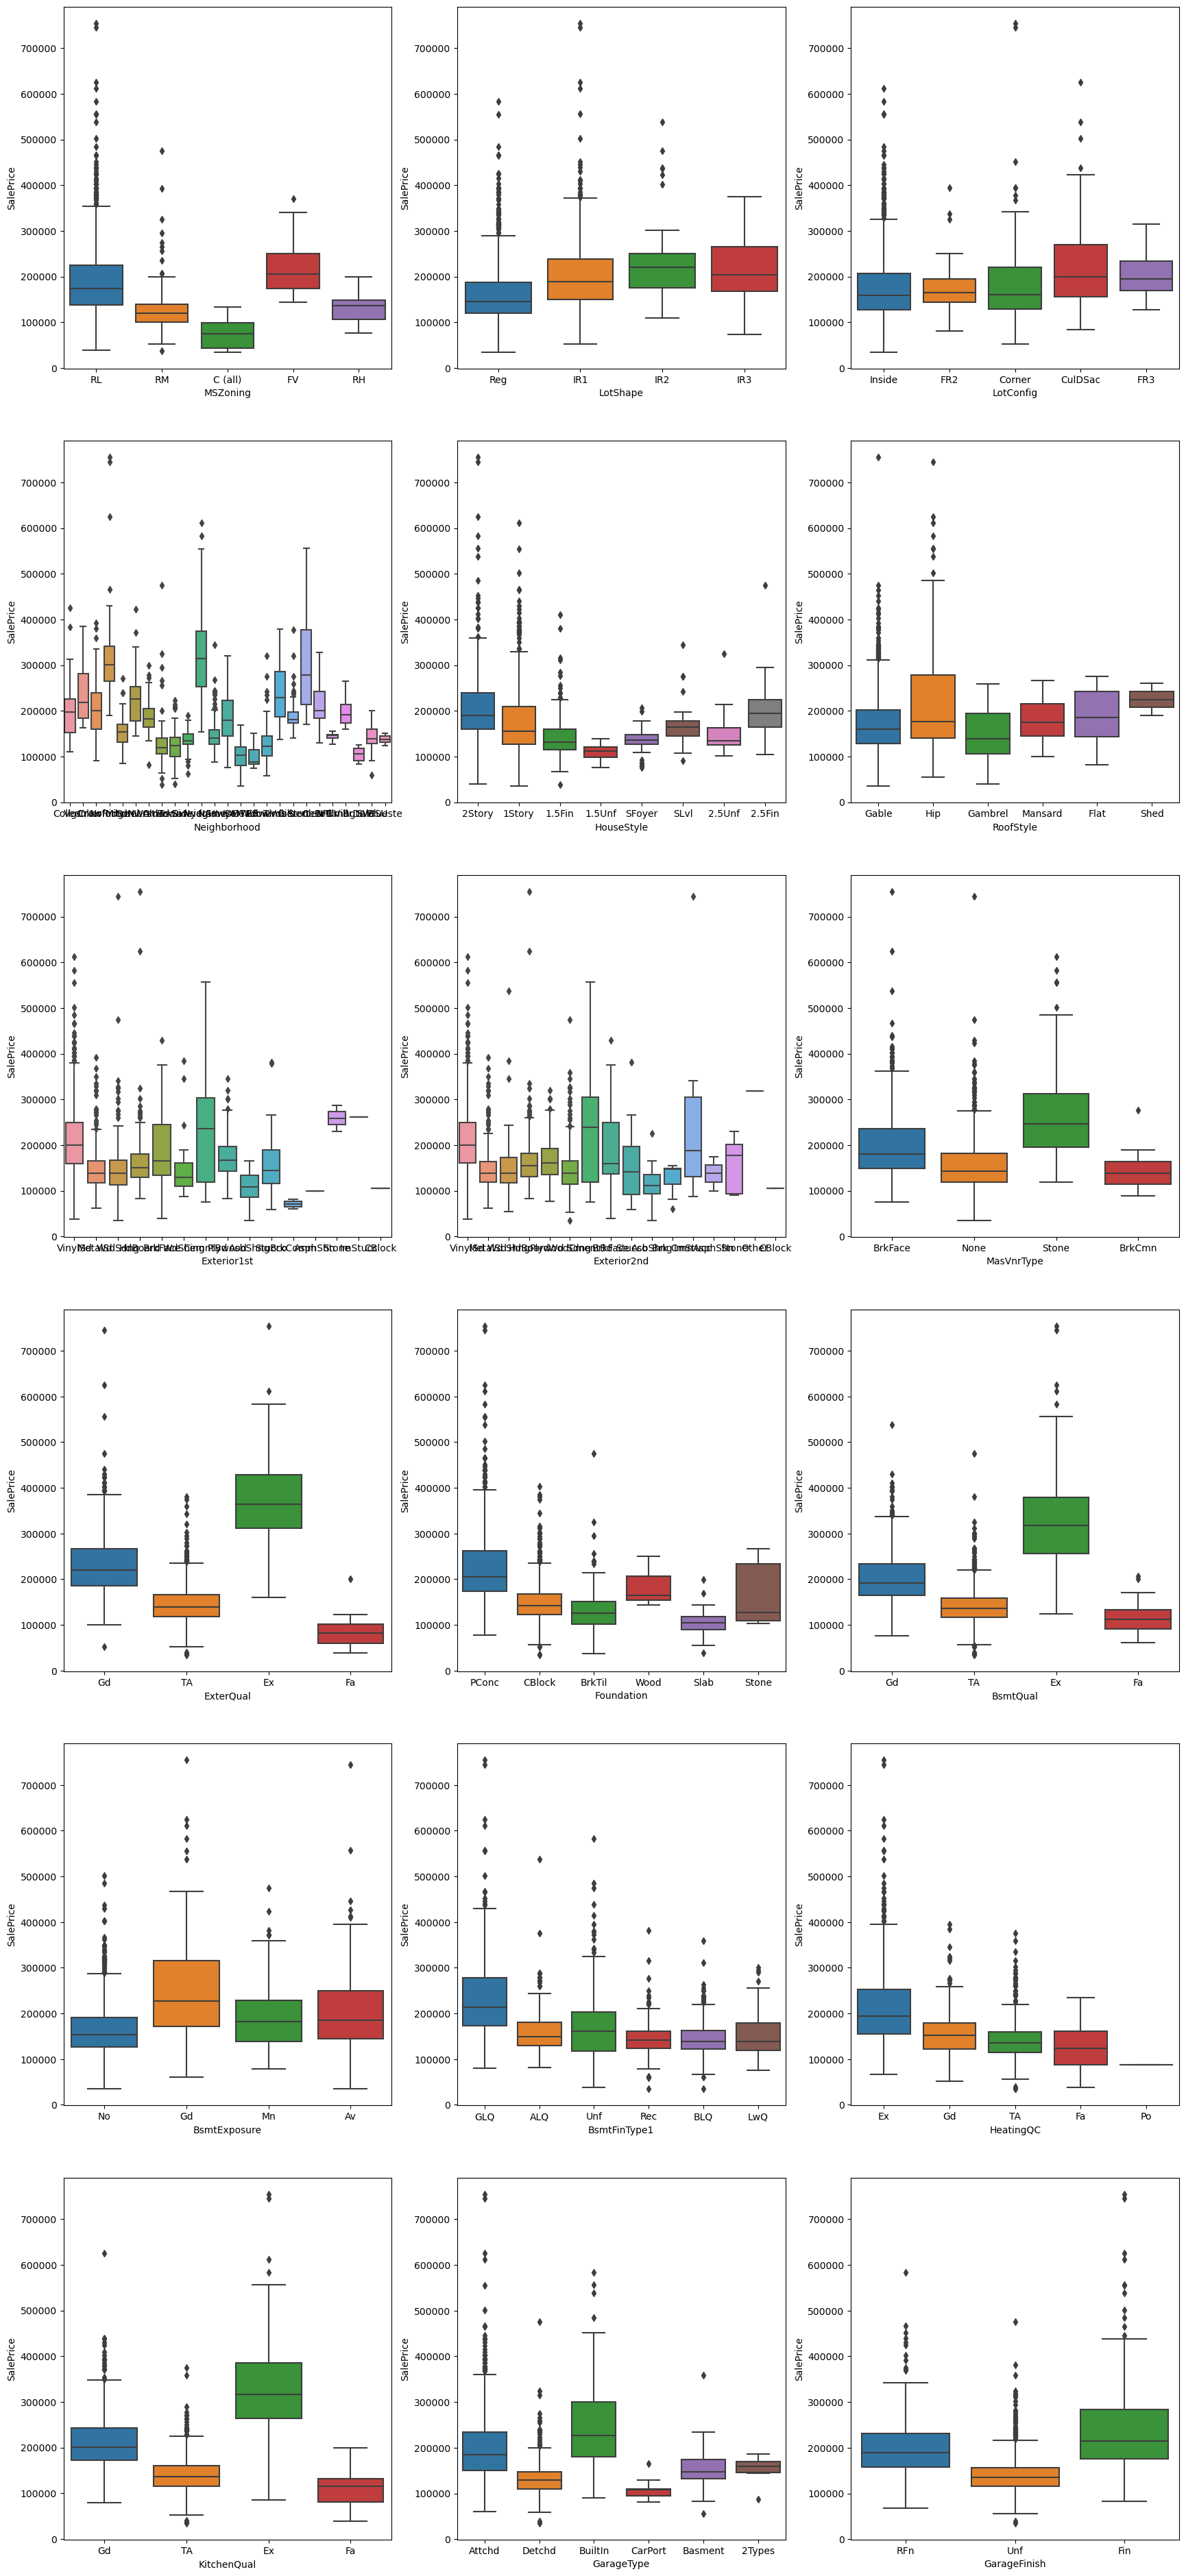

In [58]:
f, ax = plt.subplots(6,3, figsize = (21,48))
k = 0 
for i in range(6):
    for j in range(3):
        if k < 18:
            sns.boxplot(x = cat_features[k], y = 'SalePrice', data = data_temp, ax =  ax[i][j])
            k += 1

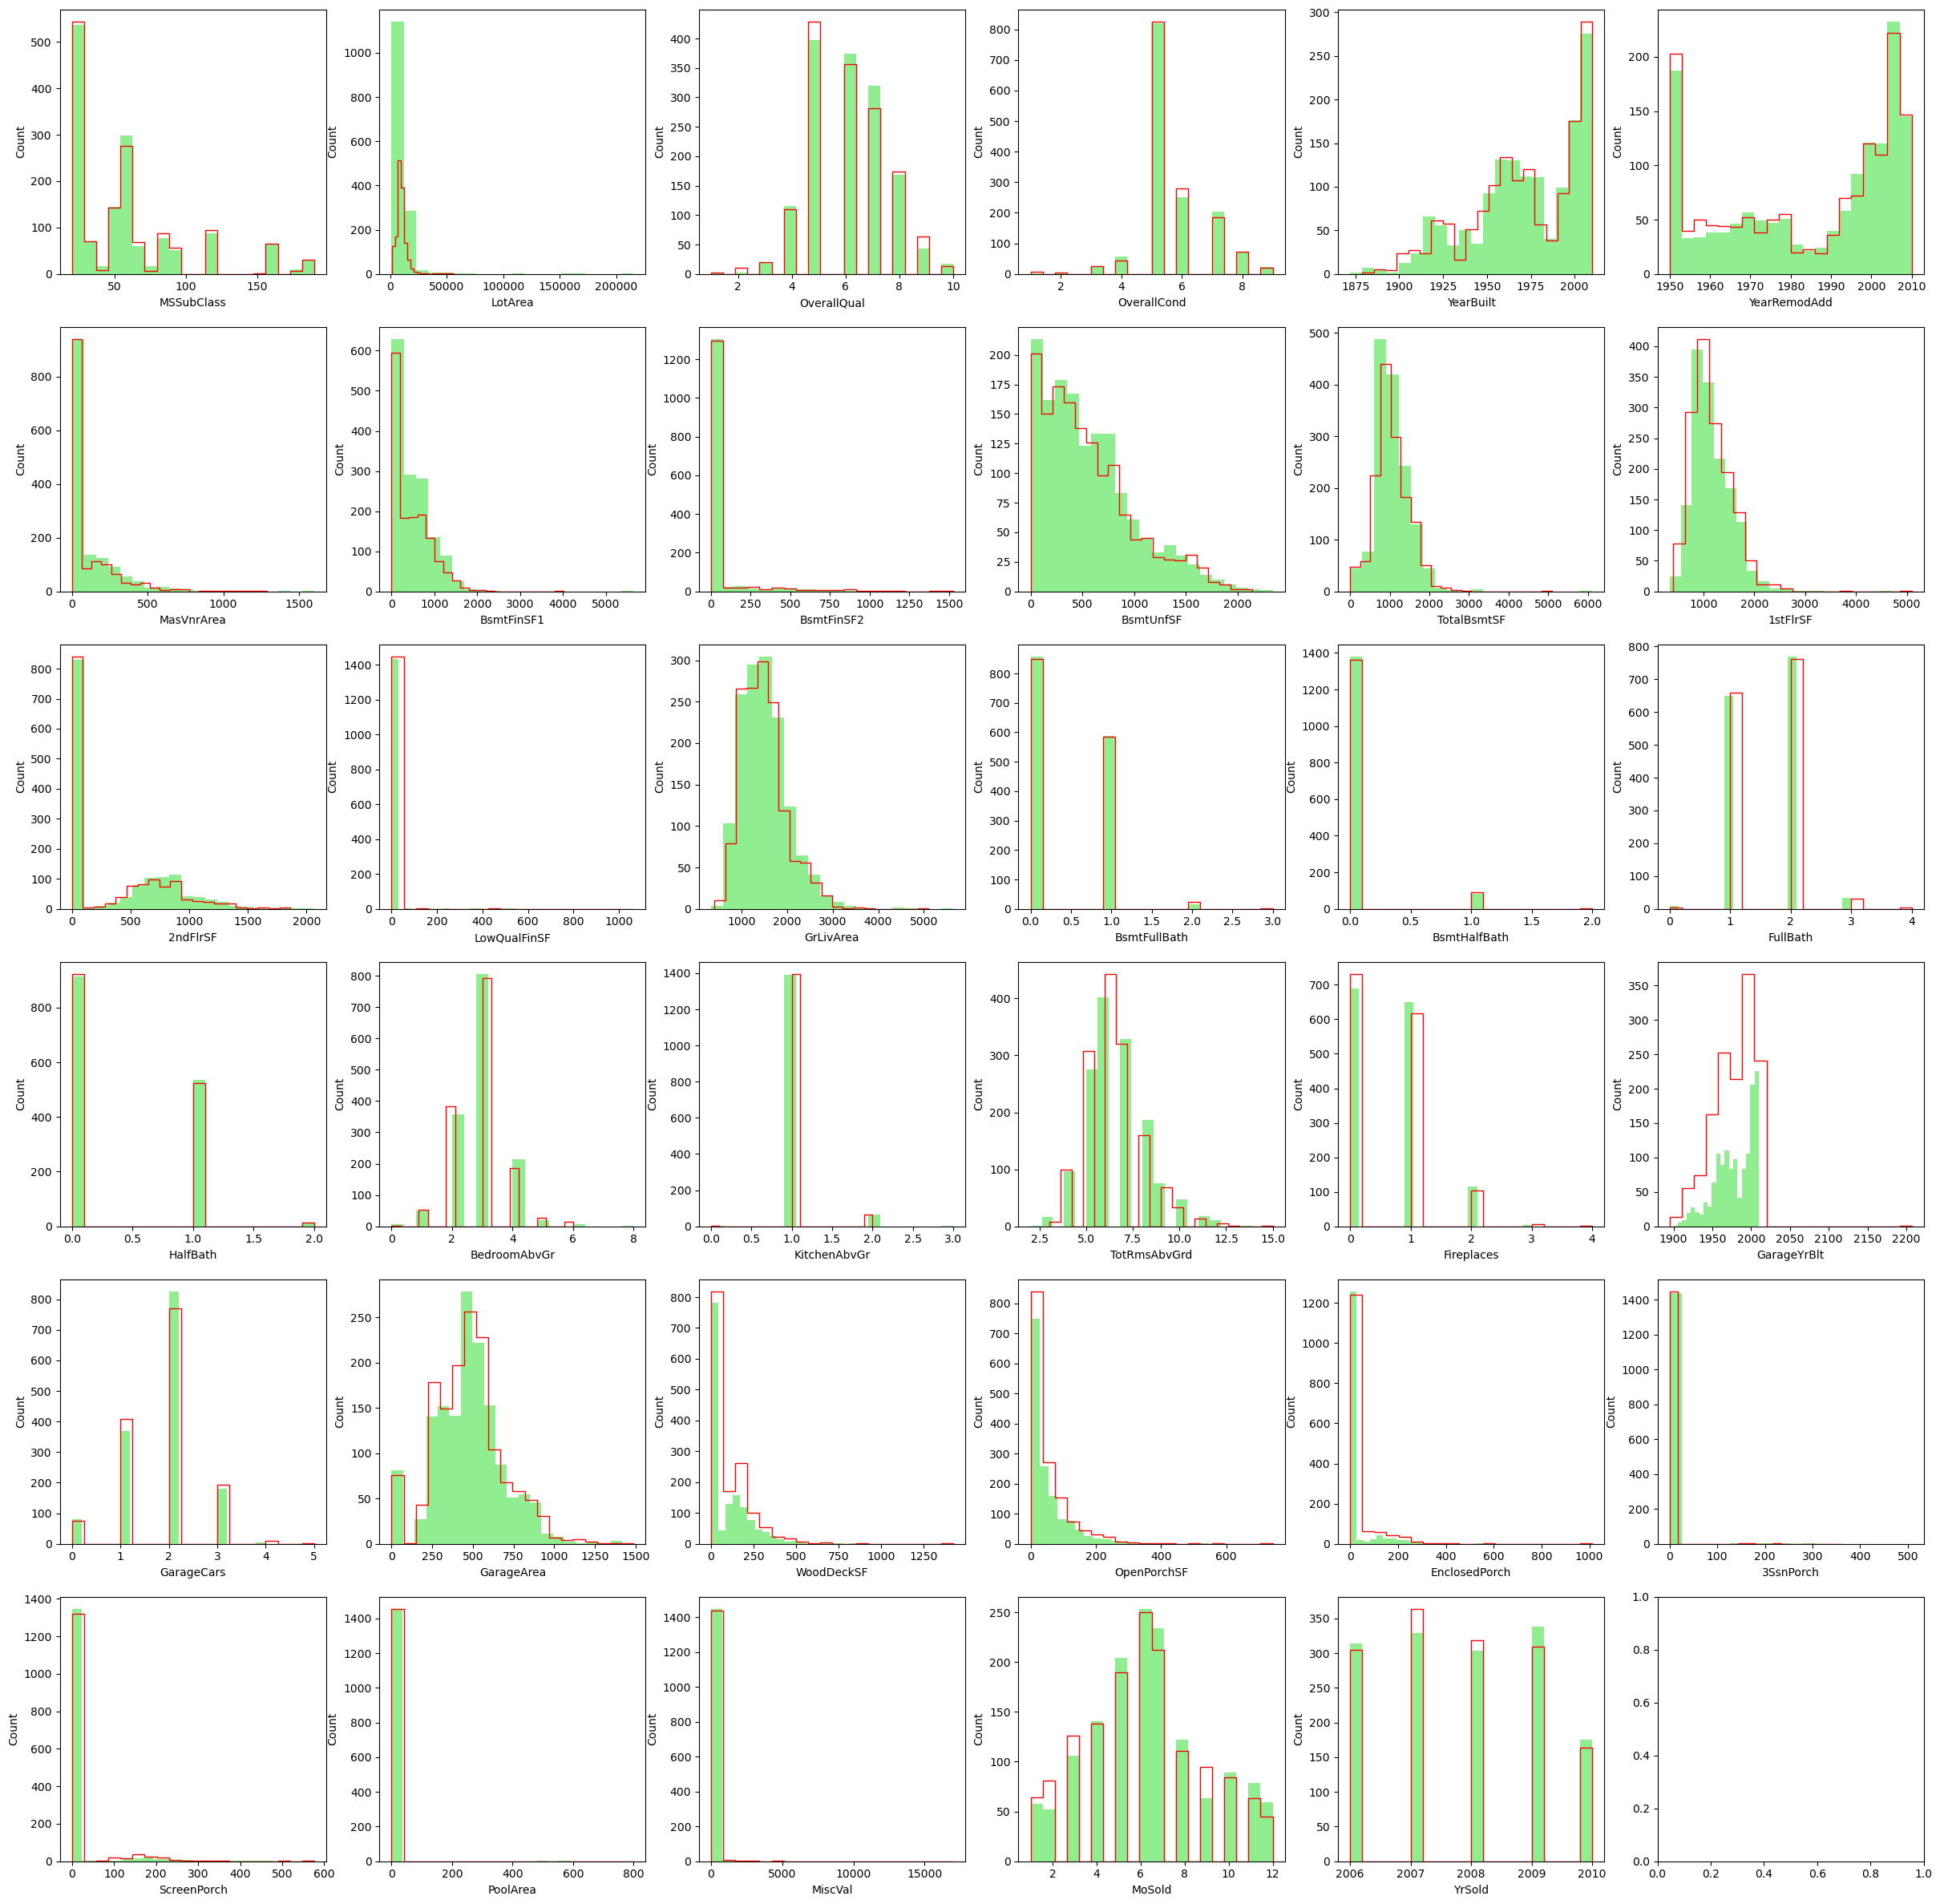

In [59]:
f,ax = plt.subplots(6,6, figsize=(30,30))
k=0
for i in range(6):
    for j in range(6):
        if k<35:
            ax[i][j].hist(data_temp[cont_features[k]], bins=20, histtype='bar', color='LightGreen')
            ax[i][j].hist(test_data[cont_features[k]], bins=20, histtype='step', color='Red')
            ax[i][j].set_xlabel(cont_features[k])
            ax[i][j].set_ylabel('Count')
            k=k+1

plt.show()

Удаление ненужных фичей

In [60]:
data_temp.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)
test_data.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)

In [61]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

# Работа с выбросами

In [62]:
def outliers(data_temp, k=3):
    q1, q3 = np.percentile(data_temp, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    outliers = [index for index, x in enumerate(data_temp) if x < lower_bound or x > upper_bound]
    
    return outliers

In [63]:
raws = []
for i in cont_features:
    raws += outliers(data_temp[i])

# кол-во выбросов
len(set(raws))

67

In [73]:
data_temp.drop(list(set(raws)), axis=0, inplace=True)

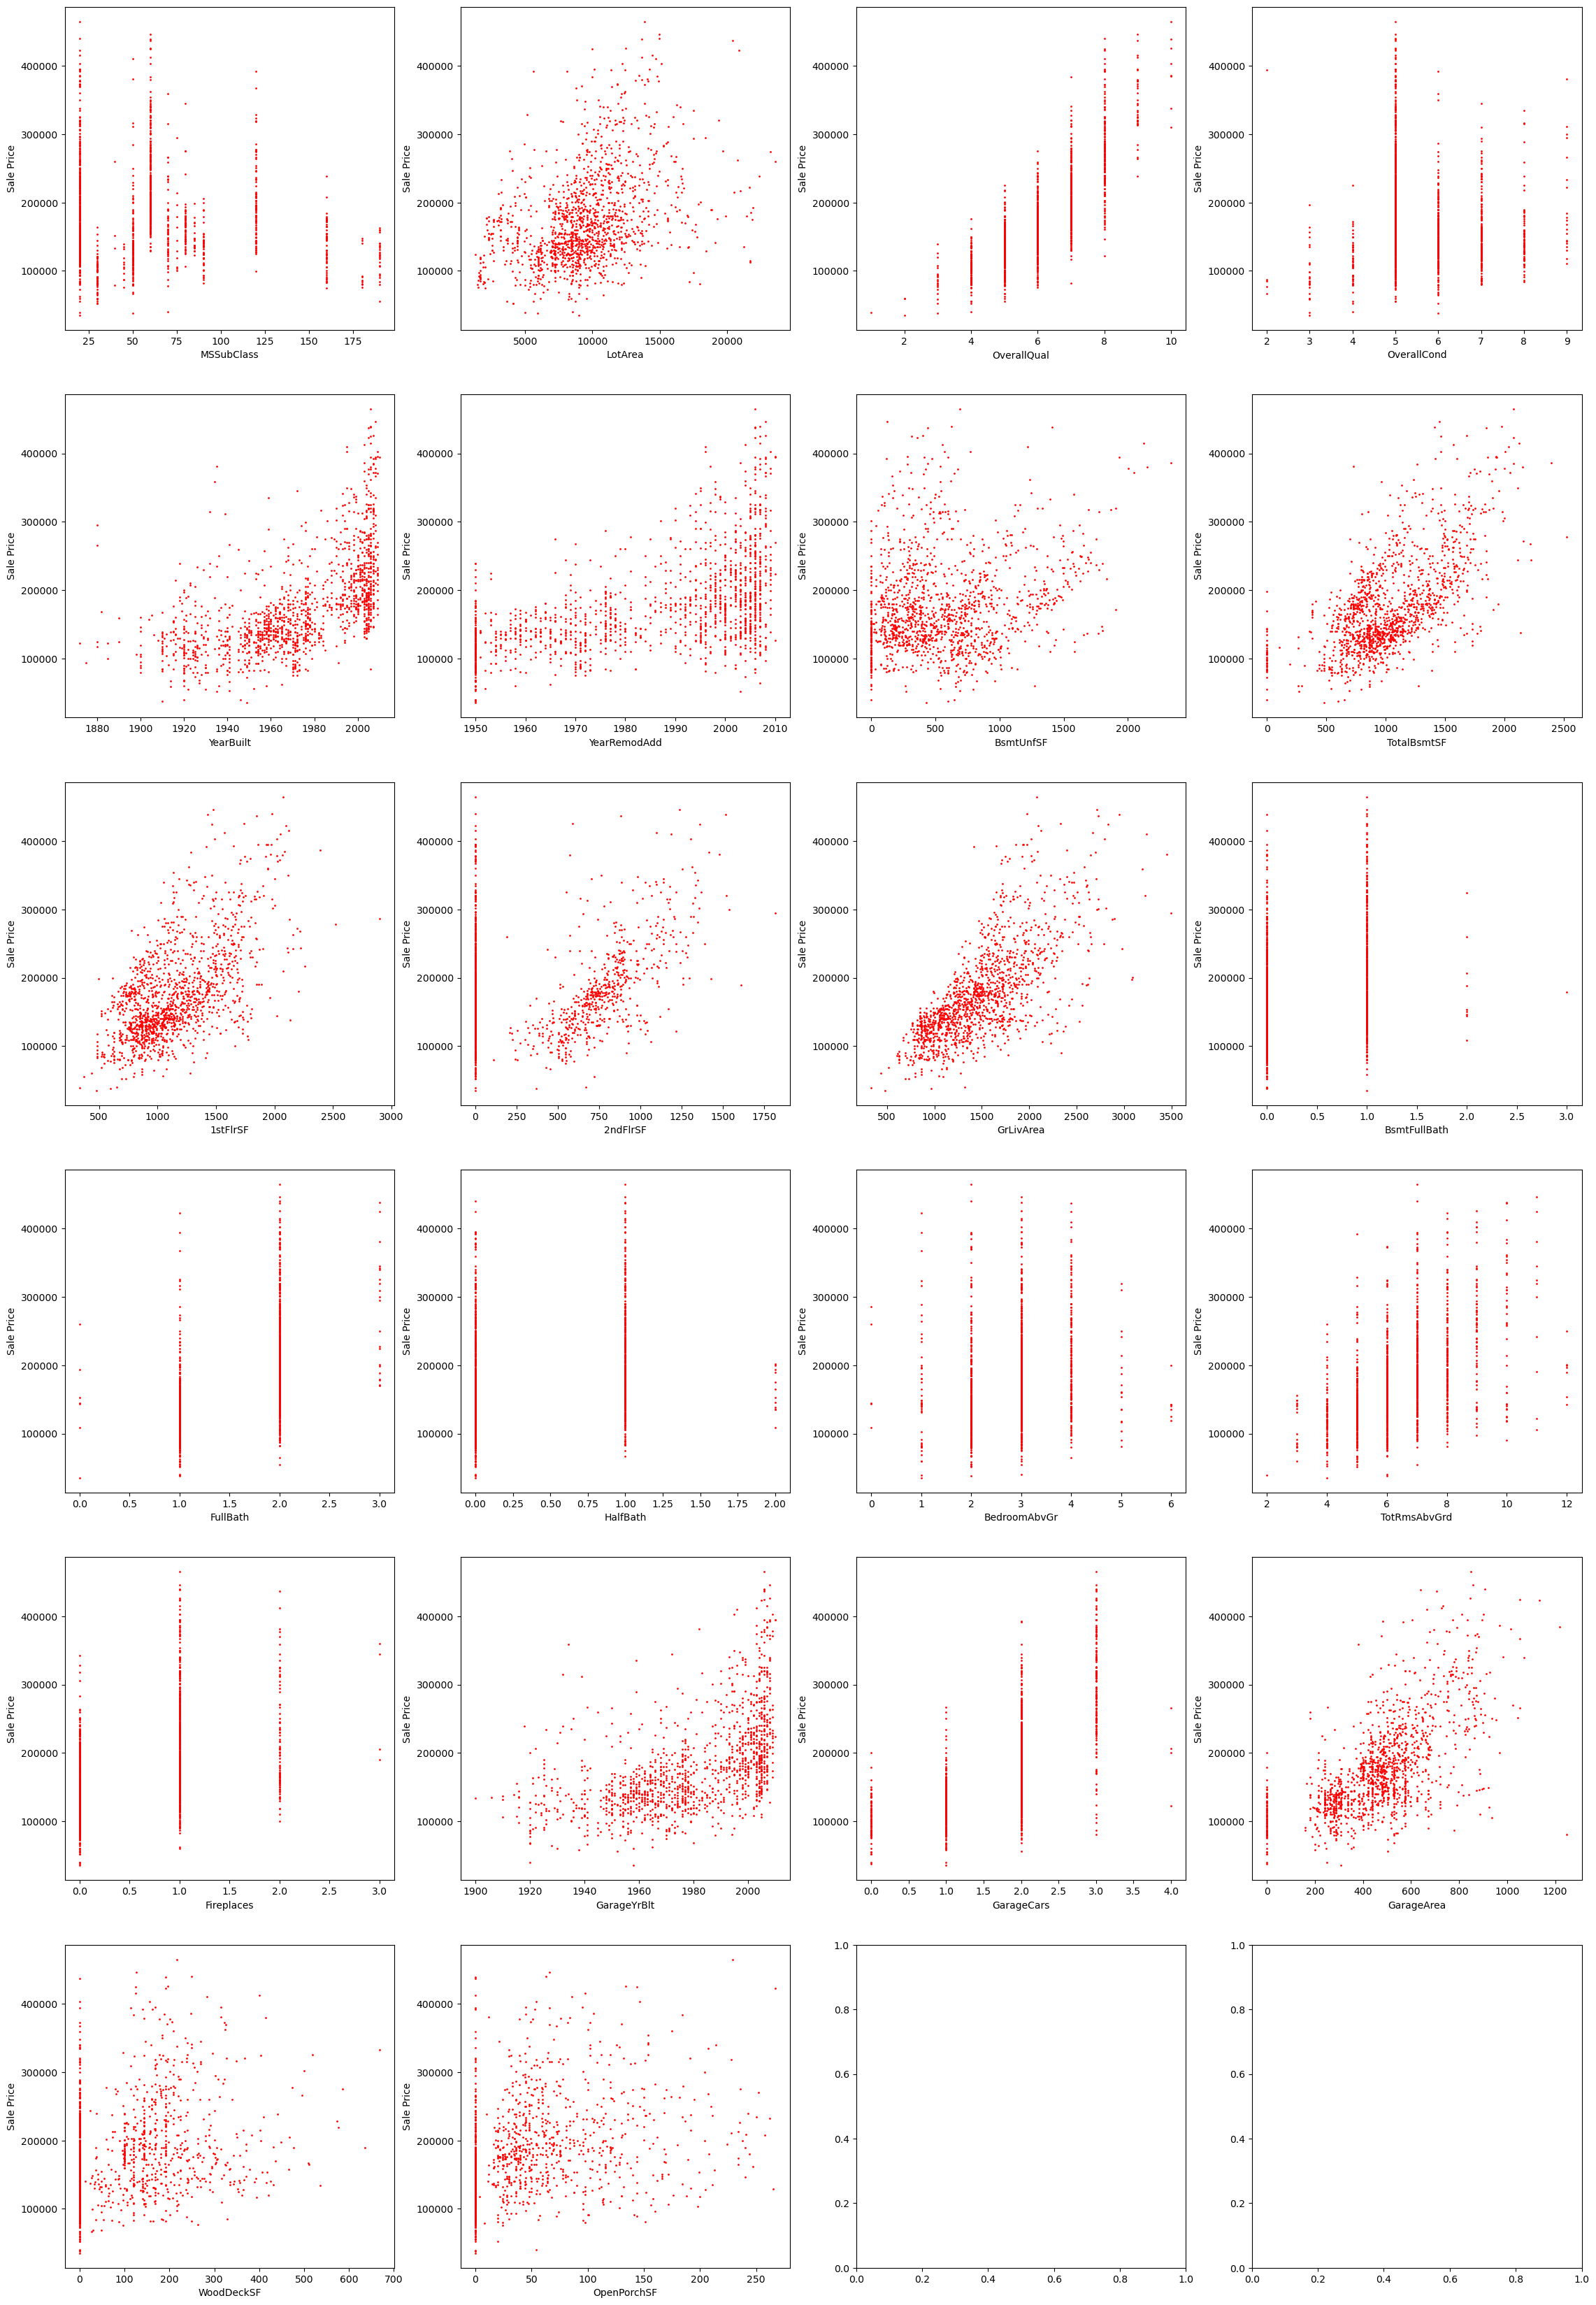

In [74]:
f,ax = plt.subplots(6,4, figsize=(28,42))
k=0
for i in range(6):
    for j in range(4):
        if k<22:
            ax[i][j].scatter(x=cont_features[k], y='SalePrice', data=data_temp, s=1, c='red')
            ax[i][j].set_xlabel(cont_features[k])
            ax[i][j].set_ylabel('Sale Price')
            k=k+1
plt.show()

In [75]:
X = data_temp.iloc[:, :-1]
y = data_temp['SalePrice']

Encoding

In [76]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

In [77]:
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    # Training Data
    enc = LabelEncoder()
    X[i] =enc.fit_transform(X[i])
    # Test Data
    enc2 = LabelEncoder()
    test_data[i] =enc2.fit_transform(test_data[i])

<AxesSubplot:>

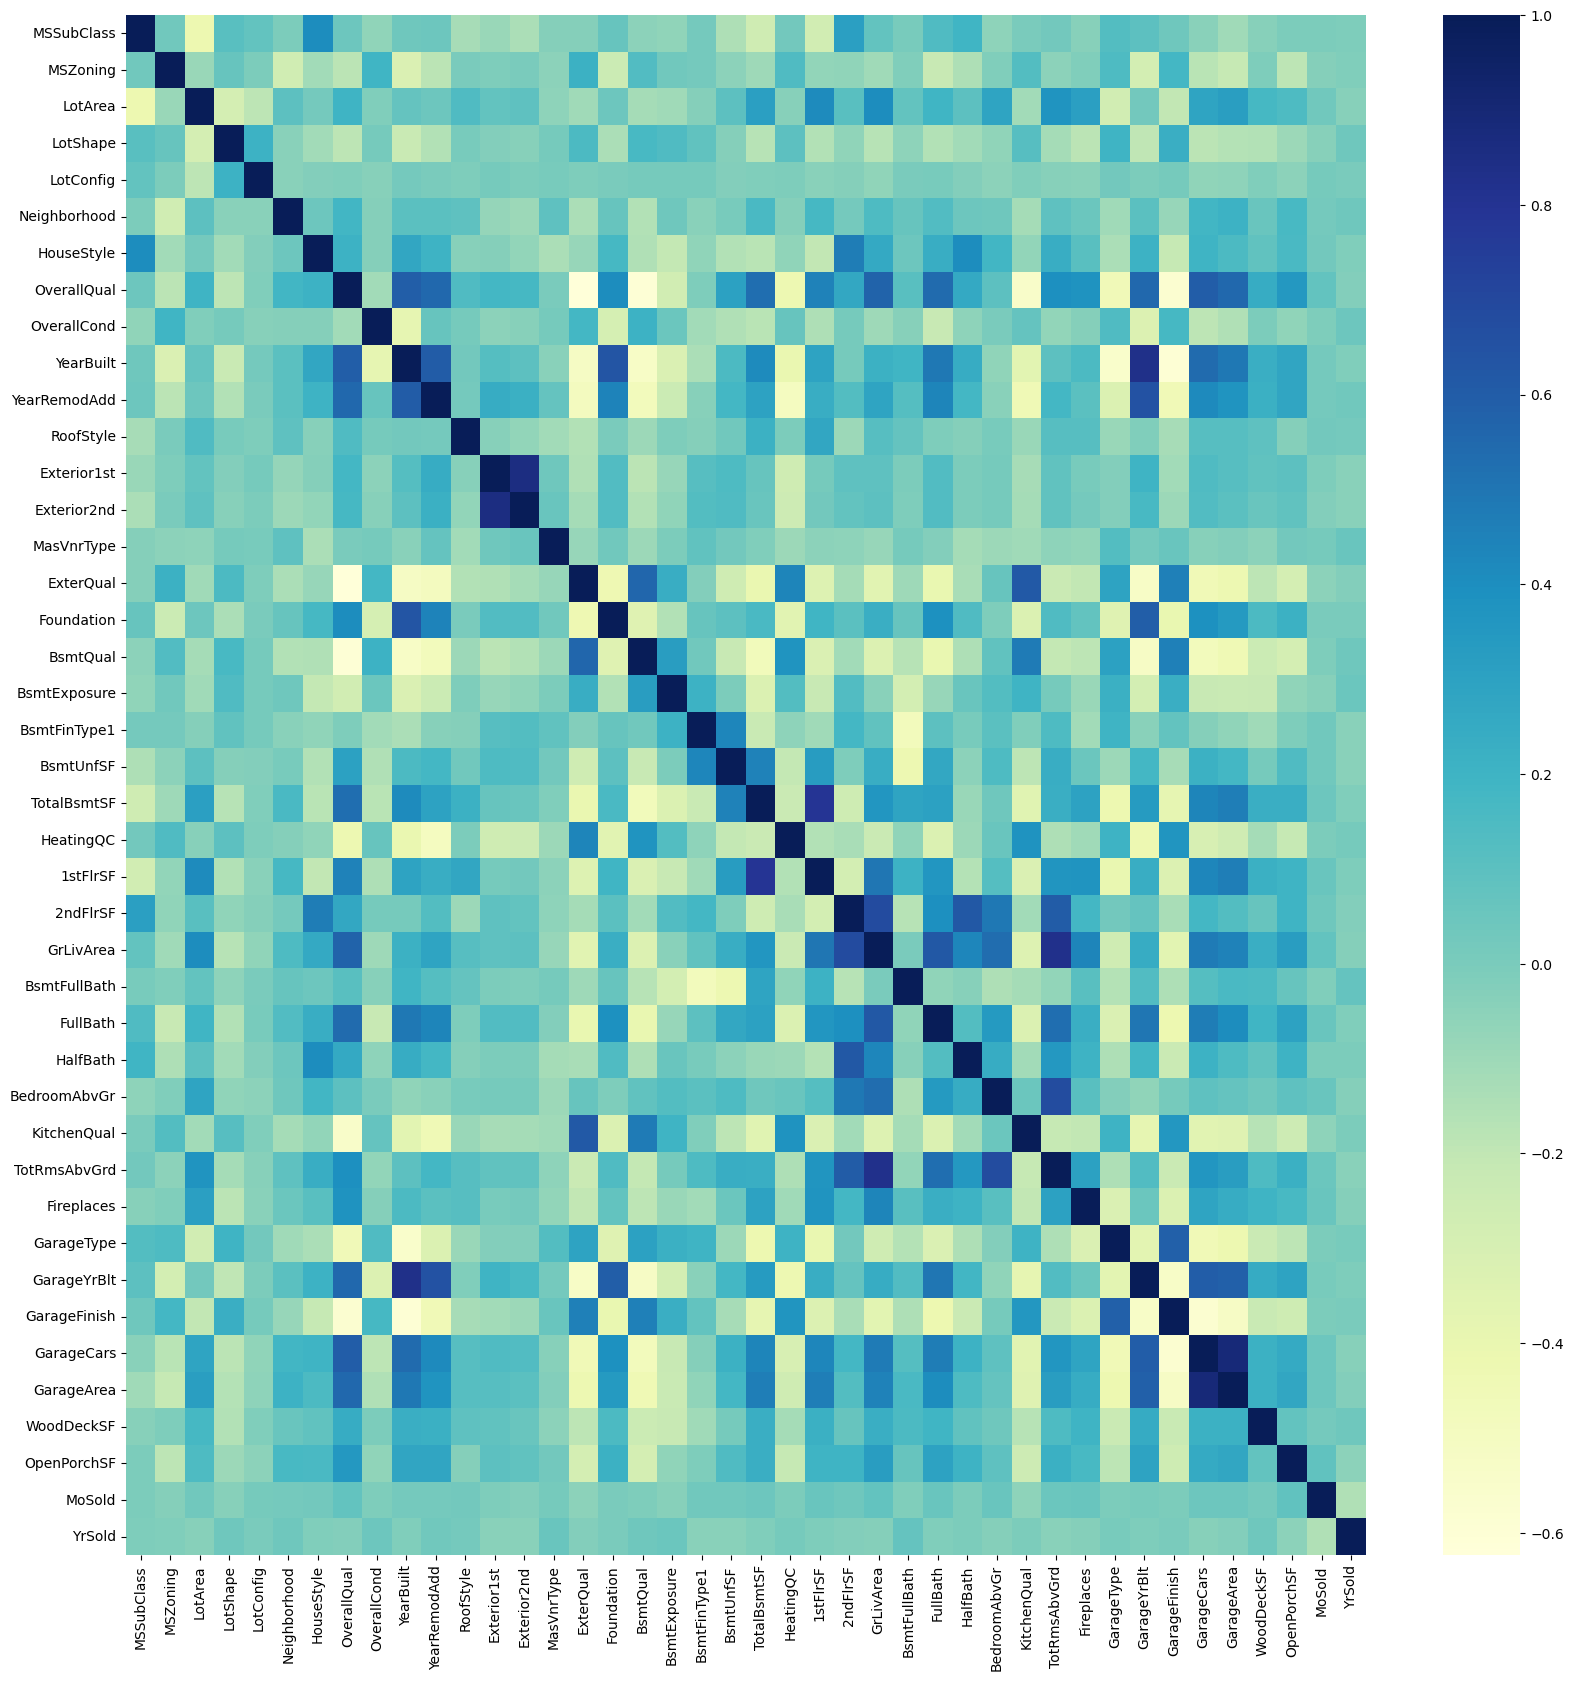

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), cmap='YlGnBu')

Работа с нанами

In [79]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
X = imputer.fit_transform(X)
test_data = imputer.transform(test_data)

# YES! Modeling

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

LinearRegression

In [87]:
from sklearn.linear_model import LinearRegression

pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linearregression', LinearRegression())
])

param_grid = {'linearregression__fit_intercept': [True, False],
              'linearregression__copy_X': [True, False]
              }

grid_search_1 = GridSearchCV(pipeline_1, param_grid, cv=12)
grid_search_1.fit(X,y)

print('Parameters : ', grid_search_1.best_params_,'\nAccuracy Score : ', grid_search_1.best_score_)

Parameters :  {'linearregression__copy_X': True, 'linearregression__fit_intercept': True} 
Accuracy Score :  0.8859161306487602


RandomForest

In [89]:
from sklearn.ensemble import RandomForestRegressor

pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf2', RandomForestRegressor())
])

param_grid_2 = {
    'clf2__n_estimators': [10, 50, 100],
    'clf2__max_features': ['auto', 'sqrt'],
    'clf2__max_depth': [5, 15],
    'clf2__min_samples_split': [2, 5],
    'clf2__min_samples_leaf': [1, 3],
}

grid_search_2 = GridSearchCV(pipeline_2, param_grid_2, cv=10)
grid_search_2.fit(X,y)

print('Parameters : ', grid_search_2.best_params_,'\nAccuracy Score : ', grid_search_2.best_score_)

Parameters :  {'clf2__max_depth': 15, 'clf2__max_features': 'sqrt', 'clf2__min_samples_leaf': 1, 'clf2__min_samples_split': 2, 'clf2__n_estimators': 100} 
Accuracy Score :  0.8931147068103235


# Final

In [93]:
final_model = RandomForestRegressor(max_features=grid_search_2.best_params_['clf2__max_features'],
                                    max_depth=grid_search_2.best_params_['clf2__max_depth'],
                                    min_samples_split=grid_search_2.best_params_['clf2__min_samples_split'],
                                    n_estimators=grid_search_2.best_params_['clf2__n_estimators'],
                                    min_samples_leaf=grid_search_2.best_params_['clf2__min_samples_leaf'])
final_model.fit(X,y)
ypre_df = final_model.predict(test_data)

Submission

In [94]:
subm = pd.read_csv('./sample_submission.csv')
subm.SalePrice = ypre_df
subm.to_csv('submission.csv', index=False)

Simple Test

In [96]:
ypre_df_1 = grid_search_1.predict(test_data)
subm_1 = pd.read_csv('./sample_submission.csv')
subm_1.SalePrice = ypre_df_1
subm_1.to_csv('submission_1.csv', index=False)